# Modeling Knowledge

Terminology inspired by Hardt and Recht.

## Generalization

We start by an experiment. In Chapter [](ch:introduction) we very quickly built two classifiers. Let us now apply what we learned to the curious problem of determining whether someone is a "cat person" or a "dog person" by looking at a picture of their face.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.top'] = 0
mpl.rcParams['axes.spines.right'] = 0
mpl.rcParams['axes.spines.left'] = 1
mpl.rcParams['axes.spines.bottom'] = 1
mpl.rcParams.update({'font.size': 12})

In [2]:
image_size = (250, 250)
scale = 0

noise = np.zeros((2, *image_size))

noise[0] = scale * np.random.randn(*image_size)
noise[1] = scale * np.random.randn(*image_size)

# noise[1] = -noise[0] # homework

from pathlib import Path
result = list(Path('./book_data/lfw/').rglob('*.jpg'))

n_train = 1000
n_test = 100
images = np.zeros((n_train, 250, 250))
labels = np.zeros((n_train,), dtype=np.int8)

images_test = np.zeros((n_test, 250, 250))
labels_test = np.zeros((n_test,), dtype=np.int8)

shuffle_idx = np.random.permutation(n_train + n_test)
for i in range(n_train):
    images[i] = plt.imread(result[shuffle_idx[i]]).mean(axis=2)
    labels[i] = np.round(np.random.rand())
    images[i] += noise[labels[i]]

for i in range(n_train, n_train + n_test):
    images_test[i - n_train] = plt.imread(result[shuffle_idx[i]]).mean(axis=2)
    labels_test[i - n_train] = np.round(np.random.rand())
    # no noise in the test set!

The interested customer has provided us with both a _training_ set and a _test_ set we can use to evaluate our method. Let's have a look at a couple of random images from the training set.

(1000, 250, 250)


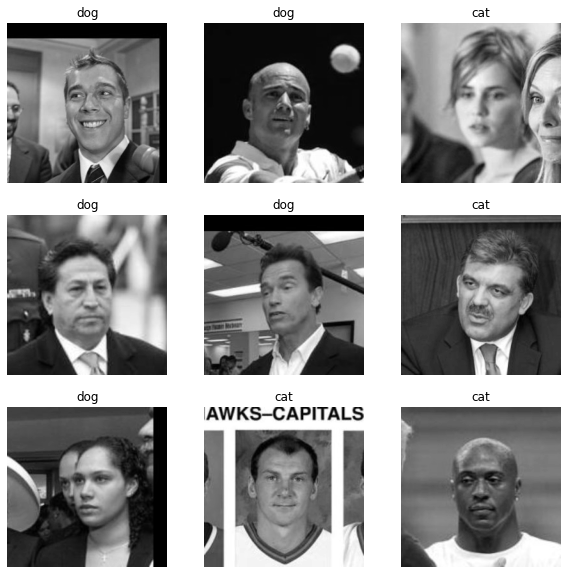

In [3]:
n_plots = 3
fig, axs = plt.subplots(n_plots, n_plots, figsize=(10, 10))

print(images.shape)
 
text_label = ['dog', 'cat']
for i in range(n_plots):
    for j in range(n_plots):
        axs[i, j].imshow(images[i*n_plots + j], cmap='gray');
        axs[i, j].axis('off')
        axs[i, j].set_title(text_label[labels[i*n_plots + j]])

Who would have thought?

Our next step is to use the code to fit a perceptron that we wrote last week. Instead of writing it again here we put it in a separate file and import here

In [4]:
from perceptron import train

labsym = labels*2 - 1
w = train(images.reshape(n_train, -1), labsym)

In [5]:
labsym_est = np.sign(images.reshape(n_train, -1) @ w)
labels_est = np.int8((labsym_est + 1) / 2)
n_correct = np.sum(labsym_est == labsym)
print('The perceptron correctly classifies %d out of %d training images' % (n_correct, n_train))

The perceptron correctly classifies 527 out of 1000 training images
